In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('Shot_Creation.csv')

In [9]:
df.drop(columns=['Matches'],inplace=True)

In [20]:
df.head()

,Player,Nation,Pos,Age,90s,SCA,SCA90,PassLive,PassDead,TO,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1
0,Mohamed Salah,eg EGY,FW,32-342,36.5,164,4.50,119,2,22,...,5,2,27,0.74,20,0,5,2,0,0
1,Virgil van Dijk,nl NED,DF,33-319,36.0,48,1.33,41,0,1,...,1,2,4,0.11,4,0,0,0,0,0
2,Ryan Gravenberch,nl NED,MF,23-007,34.4,66,1.92,58,0,5,...,0,1,6,0.17,6,0,0,0,0,0
3,Alexis Mac Allister,ar ARG,MF,26-150,28.9,120,4.15,83,24,2,...,2,3,15,0.52,10,3,0,2,0,0
4,Ibrahima Konaté,fr FRA,DF,25-363,27.8,31,1.12,26,0,0,...,0,1,7,0.25,6,0,0,0,0,1


In [28]:
df.tail()

,Player,Nation,Pos,Age,90s,SCA,SCA90,PassLive,PassDead,TO,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld.1,Def.1
606,Ronnie Edwards,eng ENG,DF,22-056,0.1,0,0.00,0,0,0,...,0,0,0,0.00,0,0,0,0,0,0
607,Carlos Alcaraz,ar ARG,MF,22-174,0.1,1,9.00,1,0,0,...,0,0,0,0.00,0,0,0,0,0,0
608,Joachim Kayi Sanda,fr FRA,DF,18-175,0.1,0,0.00,0,0,0,...,0,0,0,0.00,0,0,0,0,0,0
609,Squad Total,NaN,NaN,26.1,37.0,604,16.32,423,55,48,...,27,7,40,1.08,23,4,3,8,1,1
610,Opponent Total,NaN,NaN,27.1,37.0,1164,31.46,839,82,67,...,51,38,140,3.78,91,12,10,14,7,6


# Cleaning The Data of the Squad Total And Opponent Total

In [29]:
df = df[df['Player'] != 'Squad Total']
df = df[df['Player'] != 'Opponent Total']

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
90s,571.0,14.228897,11.430861,0.0,3.550,11.80,24.250,37.00
SCA,571.0,29.588441,33.700442,0.0,4.000,17.00,44.000,200.00
SCA90,571.0,2.158546,2.416471,0.0,0.805,1.74,2.995,32.73
PassLive,571.0,21.950963,24.581216,0.0,3.000,13.00,34.000,132.00
PassDead,571.0,2.355517,5.455213,0.0,0.000,0.00,2.000,41.00
TO,571.0,1.672504,3.115259,0.0,0.000,0.00,2.000,22.00
Sh,571.0,1.849387,2.671831,0.0,0.000,1.00,3.000,21.00
Fld,571.0,1.239930,2.106019,0.0,0.000,0.00,2.000,14.00
Def,571.0,0.520140,0.977392,0.0,0.000,0.00,1.000,7.00
GCA,571.0,3.218914,4.320420,0.0,0.000,2.00,4.000,27.00


In [31]:
df_dropped=df[df['Player'] !='Squad Total']
df2=df_dropped[df_dropped['Player'] !='Opponent Total']

In [32]:
df2.isna().values.any()

True

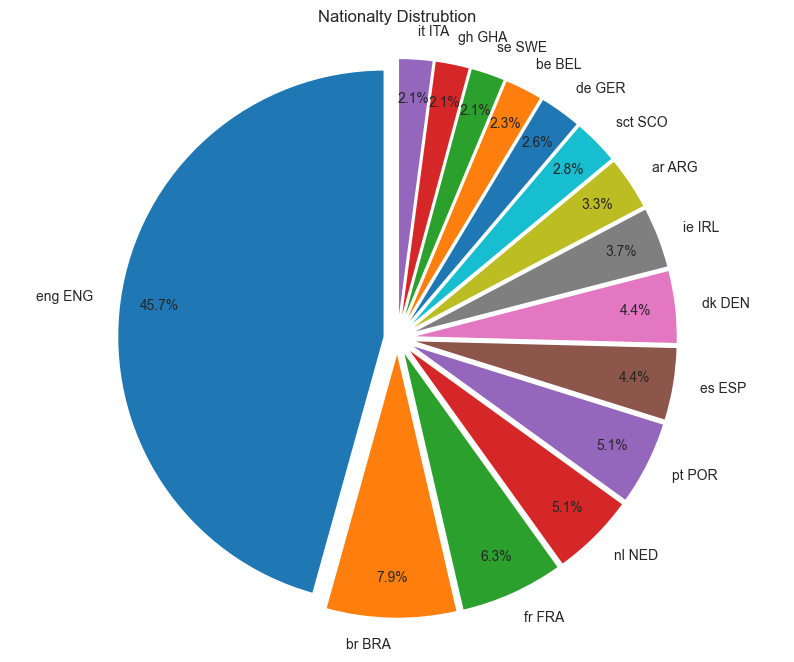

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
c=df2['Nation'].value_counts()
f=c[c>8]
explode = [0.05] * len(f)
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
plt.pie(f,labels=f.index,autopct='%1.1f%%',startangle=90,explode=explode,labeldistance=1.1,pctdistance=0.85)
plt.title('Nationalty Distrubtion')
plt.axis('equal')
plt.show()

In [34]:
min_sca=20
scatter_df=df2[(df2['SCA'] >= min_sca)]
import plotly.express as px
fig=px.scatter(scatter_df,x='SCA',y='GCA',hover_name='Player',title='Goal Creating Actions vs Shot Creating Actions Live or Dead Balls')
fig.update_layout(
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)
fig.show()

In [35]:
min_take_ons=6
bar_df=df2[df2['TO']>= min_take_ons]
fig=px.bar(bar_df,x='Player',y='TO',title='Successful Takeons that lead to a Shot')
fig.show()

In [47]:
sca_types = ['PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def']
# Rename them for clarity in the graph
rename_map = {
    'PassLive': 'PassLive',
    'PassDead': 'PassDead',
    'TO': 'TO',
    'Sh': 'Shot',
    'Fld': 'Foul',
    'Def': 'Def'
}

# Select top 10 players by total SCAs
top_players = df.groupby('Player')[sca_types].sum().sum(axis=1).nlargest(10).index

# Filter and rename
df_top = df[df['Player'].isin(top_players)]
df_grouped = df_top.groupby('Player')[sca_types].sum().reset_index()
df_grouped = df_grouped.rename(columns=rename_map)

# Melt into long format for stacked bar chart
df_melted = df_grouped.melt(id_vars='Player', var_name='action_type', value_name='count')

# Plot
fig = px.bar(df_melted, x='count', y='Player', color='action_type',
             title='SCA Type Breakdown (Top 10 Players)',
             orientation='h', text='count')

fig.update_layout(barmode='stack', yaxis={'categoryorder': 'total ascending'})
fig.show()
